In [1]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
total_data = pd.read_csv("Copy of DataSet1.csv", encoding="ISO-8859-1")

In [3]:
with open('Copy of contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
total_data.head(10)

reviewId  \
0  00046643-0edd-48d2-85f5-a3e4301ff425   
1  000c3ae0-f70b-4740-a17d-971b2d7af745   
2  0012c1f2-5a2a-4ba7-b51a-8d13091da1ba   
3  0016ad20-3496-4cdd-9b82-22badbe03e64   
4  0017961d-5c9b-4fe9-a262-400a58f1a331   
5  0017b1e6-80e0-4109-97f1-f90afb859a5b   
6  001aa187-f6dc-4d7a-bb8b-d0a0eb353963   
7  0022c866-389e-4dfa-948f-6db3ee3779f1   
8  00268c7b-e027-4b03-ad74-2d911ece6804   
9  0056231e-0bb9-472f-aad7-e861f9bdbabf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0  The App is okay. The only problem is, you allow Sellers that send wrong items. I ordered Jean and i received Pink Purse. After i rate the Seller i see that there are many reviews same as my review. It seems that the seller intentionally send wrong items for bigger profit. Since theres no warranty. And you cant report scammer Sellers . I hope you add a system to remove those Scammer Sellers like a Report Seller Option. Please work for this. We are paying right for the wrong item.   
1                                                                                                                                                                                                                                                                                                                                                                                                                             He's good, in case the others you ordered, then that's not what's coming   
2                                                                                                                                                                                                                             I bought 2 items in the same IDcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from Lazada for the missing product 2 weeks ago.. Untill now no answer regarding to my refund request!!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                            its to good to be through   
4                                                                                                                                                                                                                                                                                                                                                                                                             wide range of choices but still have a lot to do in screening products based on quality.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                  good but shipping fee kills sometimes ?????????????   
6                                                                                                                              

In [6]:
review = total_data.columns.values[1]
sentiment = total_data.columns.values[2]
review, sentiment

('content', 'score')

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  15000 non-null  object
 1   content   15000 non-null  object
 2   score     15000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [8]:
def emoji(review):
    # Senyum -- :), : ), :-), (:, ( :, (-:, :') , :O
    review = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review)
    # Tertawa -- :D, : D, :-D, xD, x-D, XD, X-D
    review = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review)
    # Cinta -- <3, :*
    review = re.sub(r'(<3|:\*)', ' positiveemoji ', review)
    # Berkedip -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review)
    # Sedih -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review)
    # Menangis -- :,(, :'(, :"(
    review = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review)
    return review

In [9]:
import re

def process_review(review):
    if isinstance(review, str):
        review = review.lower()
        review = re.sub('@[^\s]+', '', review)
        review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', review)
        review = re.sub(r"\d+", " ", review)
        review = re.sub('&quot;', " ", review)
        review = emoji(review)
        review = re.sub(r"\b[a-zA-Z]\b", "", review)
        for word in review.split():
            if word.lower() in contractions:
                review = review.replace(word, contractions[word.lower()])
        review = re.sub(r"[^\w\s]", " ", review)
        review = re.sub(r'(.)\1+', r'\1\1', review)
        review = re.sub(r"\s+", " ", review)
    else:
        review = np.nan  # or any other desired value for missing reviews
    return review

In [10]:
total_data['processed_review'] = np.vectorize(process_review)(total_data[review])

In [11]:
total_data.head(10)

reviewId  \
0  00046643-0edd-48d2-85f5-a3e4301ff425   
1  000c3ae0-f70b-4740-a17d-971b2d7af745   
2  0012c1f2-5a2a-4ba7-b51a-8d13091da1ba   
3  0016ad20-3496-4cdd-9b82-22badbe03e64   
4  0017961d-5c9b-4fe9-a262-400a58f1a331   
5  0017b1e6-80e0-4109-97f1-f90afb859a5b   
6  001aa187-f6dc-4d7a-bb8b-d0a0eb353963   
7  0022c866-389e-4dfa-948f-6db3ee3779f1   
8  00268c7b-e027-4b03-ad74-2d911ece6804   
9  0056231e-0bb9-472f-aad7-e861f9bdbabf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0  The App is okay. The only problem is, you allow Sellers that send wrong items. I ordered Jean and i received Pink Purse. After i rate the Seller i see that there are many reviews same as my review. It seems that the seller intentionally send wrong items for bigger profit. Since theres no warranty. And you cant report scammer Sellers . I hope you add a system to remove those Scammer Sellers like a Report Seller Option. Please work for this. We are paying right for the wrong item.   
1                                                                                                                                                                                                                                                                                                                                                                                                                             He's good, in case the others you ordered, then that's not what's coming   
2                                                                                                                                                                                                                             I bought 2 items in the same IDcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from Lazada for the missing product 2 weeks ago.. Untill now no answer regarding to my refund request!!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                            its to good to be through   
4                                                                                                                                                                                                                                                                                                                                                                                                             wide range of choices but still have a lot to do in screening products based on quality.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                  good but shipping fee kills sometimes ?????????????   
6                                                                                                                              

In [12]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

total_data = total_data.apply(lambda x: [stemmer.stem(i) if isinstance(i, str) else i for i in x])
total_data.head(10)

reviewId  \
0  00046643-0edd-48d2-85f5-a3e4301ff425   
1  000c3ae0-f70b-4740-a17d-971b2d7af745   
2  0012c1f2-5a2a-4ba7-b51a-8d13091da1ba   
3  0016ad20-3496-4cdd-9b82-22badbe03e64   
4  0017961d-5c9b-4fe9-a262-400a58f1a331   
5  0017b1e6-80e0-4109-97f1-f90afb859a5b   
6  001aa187-f6dc-4d7a-bb8b-d0a0eb353963   
7  0022c866-389e-4dfa-948f-6db3ee3779f1   
8  00268c7b-e027-4b03-ad74-2d911ece6804   
9  0056231e-0bb9-472f-aad7-e861f9bdbabf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0  the app is okay. the only problem is, you allow sellers that send wrong items. i ordered jean and i received pink purse. after i rate the seller i see that there are many reviews same as my review. it seems that the seller intentionally send wrong items for bigger profit. since theres no warranty. and you cant report scammer sellers . i hope you add a system to remove those scammer sellers like a report seller option. please work for this. we are paying right for the wrong item.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                he's good, in case the others you ordered, then that's not what's com   
2                                                                                                                                                                                                                             i bought 2 items in the same idcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from lazada for the missing product 2 weeks ago.. untill now no answer regarding to my refund request!!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                            its to good to be through   
4                                                                                                                                                                                                                                                                                                                                                                                                             wide range of choices but still have a lot to do in screening products based on quality.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                  good but shipping fee kills sometimes ?????????????   
6                                                                                                                              

In [13]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
            "you", "your", "yours", "yourself", "yourselves", "he", "him",
            "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
            "which", "who", "whom", "this", "that", "these", "those", "am", "is",
            "are", "was", "were", "be", "been", "being", "have", "has", "had",
            "having", "do", "does", "did", "doing", "a", "an", "the", "and",
            "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through",
            "during", "before", "after", "above", "below", "to", "from", "up",
            "down", "in", "out", "on", "off", "over", "under", "again", "further",
            "then", "once", "here", "there", "when", "where", "why", "how", "all",
            "any", "both", "each", "few", "more", "most", "other", "some", "such",
            "only", "own", "same", "so", "than", "too", "very",
            "can", "will", "just", "should", "now", "hate"}
print(stop_words)

{'is', 'how', 'further', 'where', 'their', 'this', 'we', 'it', 'out', 'hers', 'any', 'now', 'these', 'does', 'from', 'have', 'as', 'himself', 'they', 'about', 'just', 'a', 'before', 'yourself', 'or', 'too', 'his', 'she', 'be', 'its', 'there', 'been', 'them', 'again', 'the', 'herself', 'our', 'on', 'both', 'each', 'had', 'same', 'he', 'ours', 'above', 'being', 'during', 'what', 'were', 'yourselves', 'such', 'by', 'themselves', 'until', 'whom', 'myself', 'up', 'after', 'here', 'him', 'will', 'than', 'ourselves', 'most', 'while', 'for', 'an', 'why', 'who', 'into', 'because', 'at', 'very', 'over', 'do', 'with', 'all', 'so', 'more', 'in', 'own', 'was', 'and', 'then', 'between', 'has', 'that', 'yours', 'some', 'when', 'down', 'below', 'against', 'my', 'to', 'but', 'only', 'having', 'those', 'should', 'did', 'can', 'doing', 'through', 'me', 'which', 'few', 'itself', 'under', 'if', 'i', 'your', 'off', 'theirs', 'other', 'of', 'hate', 'you', 'am', 'are', 'once', 'her'}


In [14]:
from textblob import TextBlob

def sentiment_analysis(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [15]:
total_data['sentiment'] = total_data['processed_review'].apply(sentiment_analysis)
total_data.head(10)

reviewId  \
0  00046643-0edd-48d2-85f5-a3e4301ff425   
1  000c3ae0-f70b-4740-a17d-971b2d7af745   
2  0012c1f2-5a2a-4ba7-b51a-8d13091da1ba   
3  0016ad20-3496-4cdd-9b82-22badbe03e64   
4  0017961d-5c9b-4fe9-a262-400a58f1a331   
5  0017b1e6-80e0-4109-97f1-f90afb859a5b   
6  001aa187-f6dc-4d7a-bb8b-d0a0eb353963   
7  0022c866-389e-4dfa-948f-6db3ee3779f1   
8  00268c7b-e027-4b03-ad74-2d911ece6804   
9  0056231e-0bb9-472f-aad7-e861f9bdbabf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0  the app is okay. the only problem is, you allow sellers that send wrong items. i ordered jean and i received pink purse. after i rate the seller i see that there are many reviews same as my review. it seems that the seller intentionally send wrong items for bigger profit. since theres no warranty. and you cant report scammer sellers . i hope you add a system to remove those scammer sellers like a report seller option. please work for this. we are paying right for the wrong item.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                he's good, in case the others you ordered, then that's not what's com   
2                                                                                                                                                                                                                             i bought 2 items in the same idcode, only one item was delivered to me, another was missing in transhipment ( from what seller said), then i requested a refund from lazada for the missing product 2 weeks ago.. untill now no answer regarding to my refund request!!!   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                            its to good to be through   
4                                                                                                                                                                                                                                                                                                                                                                                                             wide range of choices but still have a lot to do in screening products based on quality.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                  good but shipping fee kills sometimes ?????????????   
6                                                                                                                              

In [16]:
tokenized_review = total_data['processed_review'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [the, app, is, okay, the, only, problem, is, you, allow, sellers, that, send, wrong, items, ordered, jean, and, received, pink, purse, after, rate, the, seller, see, that, there, are, many, reviews, same, as, my, review, it, seems, that, the, seller, intentionally, send, wrong, items, for, bigger, profit, since, theres, no, warranty, and, you, cant, report, scammer, sellers, hope, you, add, system, to, remove, those, scammer, sellers, like, report, seller, option, please, work, for, this, we, are, paying, right, for, the, wrong, item]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

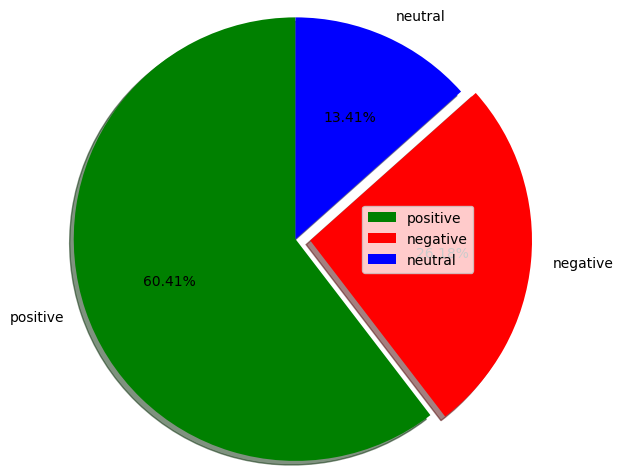

In [17]:
sentiment_counts = total_data['sentiment'].value_counts()
sentiments = sentiment_counts.index.tolist()
slices = sentiment_counts.values.tolist()
colors = ['g', 'r', 'b']

fig, ax = plt.subplots()
ax.pie(slices, labels=sentiments, colors=colors, startangle=90, shadow=True,
       explode=(0, 0.1, 0), radius=1.5, autopct='%1.2f%%')
ax.legend()

plt.show()

<Figure size 3840x2880 with 0 Axes>

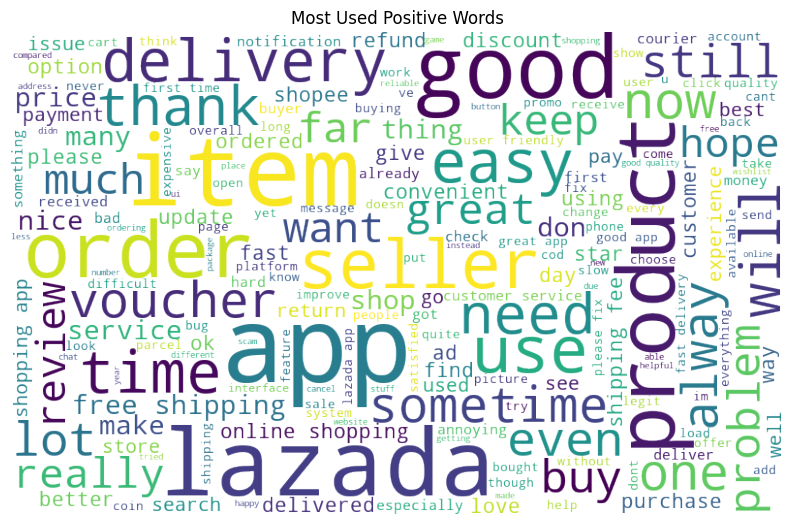

In [18]:
positive_words =' '.join([text for text in total_data['processed_review'][total_data[sentiment] !=1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('positive_words.png')
plt.show()

<Figure size 3840x2880 with 0 Axes>

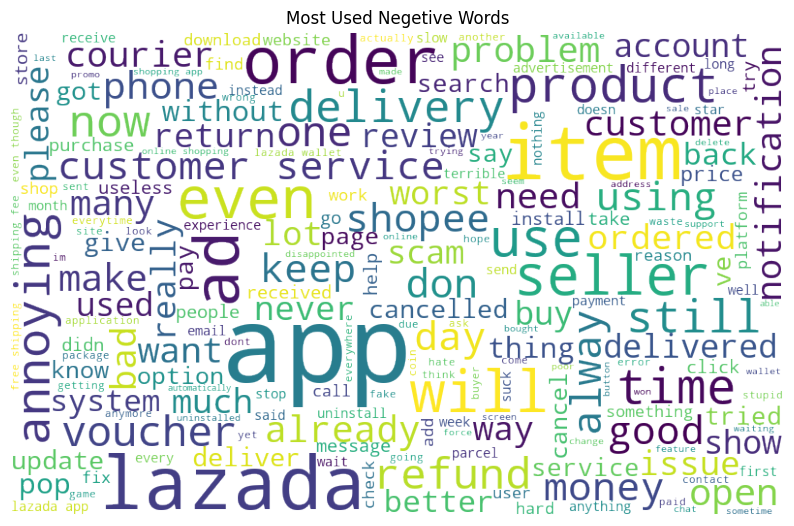

In [19]:
negetive_words =' '.join([text for text in total_data['processed_review'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('negetive_words.png')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(total_data['processed_review'])

feature_names = tf_idf_vectorizer.get_feature_names_out()

for doc_idx, doc in enumerate(final_vectorized_data):
    print("Document ", doc_idx + 1)
    count = 0
    for feature_idx, tfidf_score in zip(doc.indices, doc.data):
        print(feature_names[feature_idx], ": ", tfidf_score)
        count += 1
        if count >= 30:
            break
    if count >= 30:
        break

Document  1
the wrong item :  0.06089343276981106
for the wrong :  0.07876348166792912
right for the :  0.07876348166792912
paying right for :  0.07876348166792912
are paying right :  0.07554502668450204
we are paying :  0.06881944175332506
this we are :  0.07876348166792912
for this we :  0.07876348166792912
work for this :  0.07876348166792912
please work for :  0.07876348166792912
option please work :  0.07876348166792912
seller option please :  0.07876348166792912
report seller option :  0.07876348166792912
like report seller :  0.07876348166792912
sellers like report :  0.07876348166792912
scammer sellers like :  0.07876348166792912
those scammer sellers :  0.07876348166792912
remove those scammer :  0.07876348166792912
to remove those :  0.07326149653305414
system to remove :  0.07876348166792912
add system to :  0.07876348166792912
you add system :  0.07876348166792912
hope you add :  0.07326149653305414
sellers hope you :  0.07876348166792912
scammer sellers hope :  0.078763481

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data['sentiment'],
                                                    test_size=0.2, random_state=69)

In [22]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (12000, 422501)
X_test_shape :  (3000, 422501)
y_train_shape :  (12000,)
y_test_shape :  (3000,)


In [23]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

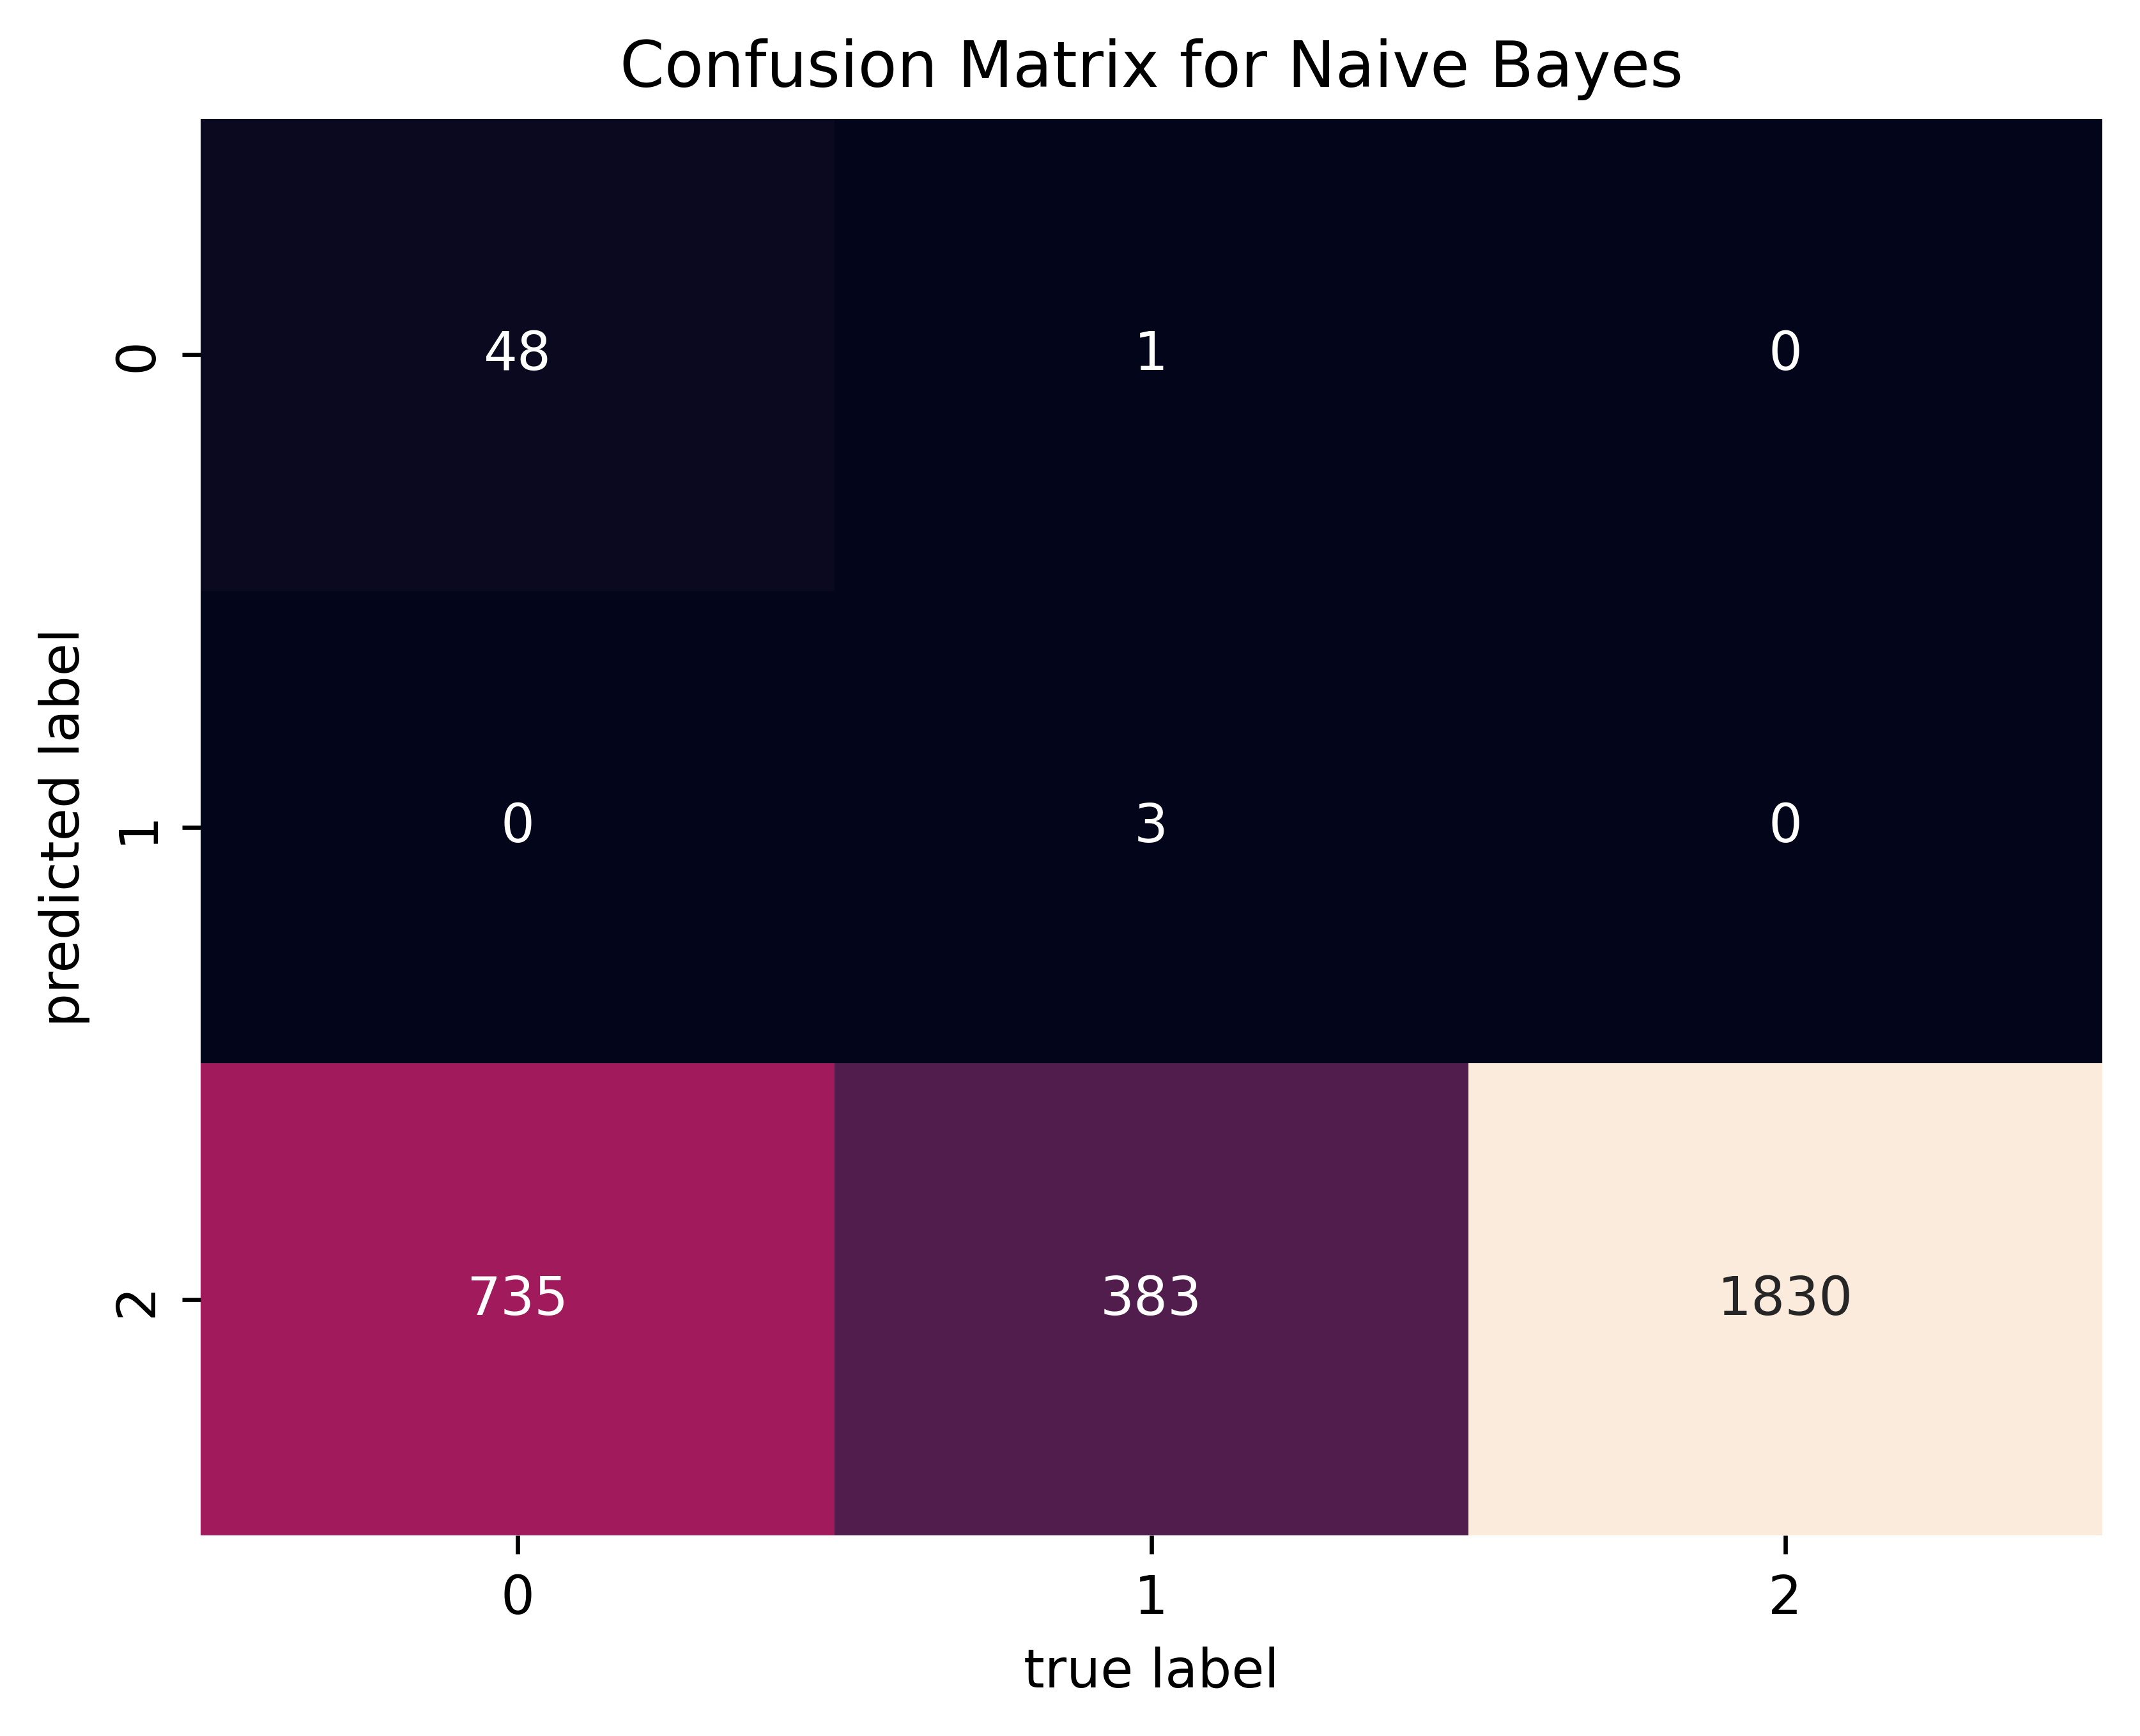

In [24]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

score_naive = accuracy_score(predicted_naive, y_test)
precision_naive = precision_score(y_test, predicted_naive, average='weighted')
recall_naive = recall_score(y_test, predicted_naive, average='weighted')
f1_score_naive = f1_score(y_test, predicted_naive, average='weighted')

print("Accuracy with Naive-bayes: ", score_naive)
print("Precision with Naive-bayes: ", precision_naive)
print("Recall with Naive-bayes: ", recall_naive)
print("F-measure with Naive-bayes: ", f1_score_naive)

Accuracy with Naive-bayes:  0.627
Precision with Naive-bayes:  0.7633369700661812
Recall with Naive-bayes:  0.627
F-measure with Naive-bayes:  0.4993666387609878


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    negative       0.98      0.06      0.12       783
     neutral       1.00      0.01      0.02       387
    positive       0.62      1.00      0.77      1830

    accuracy                           0.63      3000
   macro avg       0.87      0.36      0.30      3000
weighted avg       0.76      0.63      0.50      3000



In [27]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [28]:
word2vec_model = Word2Vec(tokenized_review, vector_size=200, window=5, min_count=2, sg=1, workers=4)
word2vec_model.train(tokenized_review, total_examples=len(tokenized_review), epochs=10)

(3122471, 4223170)

In [29]:
word2vec_model.wv.most_similar('good')

[('satisfying', 0.7260857224464417),
 ('satisfactory', 0.6885623335838318),
 ('excellent', 0.6807572841644287),
 ('exceptional', 0.6472046375274658),
 ('materials', 0.6353839039802551),
 ('varity', 0.6295662522315979),
 ('convienent', 0.6287919878959656),
 ('okey', 0.627140998840332),
 ('diliver', 0.6254260540008545),
 ('drivers', 0.6232704520225525)]

In [30]:
word2vec_model.wv.most_similar('bad')

[('horrible', 0.5025495290756226),
 ('unsatisfied', 0.4908835291862488),
 ('watchout', 0.4705880284309387),
 ('ineffective', 0.46725234389305115),
 ('unpredictable', 0.4667152762413025),
 ('integrity', 0.465060293674469),
 ('aftersales', 0.4644818902015686),
 ('infested', 0.4632191061973572),
 ('oriented', 0.45660296082496643),
 ('expirience', 0.4561687707901001)]

In [31]:
document = []

for i in range(len(tokenized_review)):
    if len(tokenized_review.iloc[i]) >= 4:
        a=tokenized_review.iloc[i][3]
        document.append(a)

document[0:50]

['okay',
 'case',
 'the',
 'to',
 'choices',
 'fee',
 'should',
 'made',
 'message',
 'if',
 'is',
 'is',
 'in',
 'on',
 'allows',
 'unlike',
 'time',
 'garbage',
 'fix',
 'may',
 'are',
 'to',
 'view',
 'single',
 'change',
 'problem',
 'problem',
 'some',
 'an',
 'rate',
 'are',
 'though',
 'use',
 'notifications',
 'app',
 'be',
 'from',
 'me',
 'option',
 'not',
 'many',
 'gcash',
 'more',
 'me',
 'everywhere',
 'lazada',
 'all',
 'we',
 'through',
 'choic']

In [32]:
doc_clean = tokenized_review
doc_clean[0:10]

0    [the, app, is, okay, the, only, problem, is, you, allow, sellers, that, send, wrong, items, ordered, jean, and, received, pink, purse, after, rate, the, seller, see, that, there, are, many, reviews, same, as, my, review, it, seems, that, the, seller, intentionally, send, wrong, items, for, bigger, profit, since, theres, no, warranty, and, you, cant, report, scammer, sellers, hope, you, add, system, to, remove, those, scammer, sellers, like, report, seller, option, please, work, for, this, we, are, paying, right, for, the, wrong, item]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [33]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<12155 unique tokens: ['add', 'after', 'allow', 'and', 'app']...>


In [34]:
# Membuat object untuk LDA model menggunakan gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

In [35]:
# Jalankan dan Uji LDA model pada document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.042*"the" + 0.035*"to" + 0.031*"it" + 0.027*"app" + 0.021*"and" + 0.018*"is" + 0.015*"this" + 0.012*"you" + 0.012*"my" + 0.011*"on"'),
 (1,
  '0.046*"the" + 0.030*"to" + 0.021*"and" + 0.017*"is" + 0.016*"it" + 0.016*"not" + 0.014*"my" + 0.014*"of" + 0.013*"but" + 0.012*"for"'),
 (2,
  '0.039*"and" + 0.029*"to" + 0.028*"good" + 0.028*"the" + 0.022*"is" + 0.019*"lazada" + 0.017*"app" + 0.016*"for" + 0.015*"shopping" + 0.015*"of"')]

In [36]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

        word  topic_id  importance  word_count
0        the         0    0.042240       17654
1         to         0    0.035357       13864
2         it         0    0.031086        9017
3        app         0    0.027440        6191
4        and         0    0.020584       10769
5         is         0    0.018117        8144
6       this         0    0.014653        4094
7        you         0    0.012333        4896
8         my         0    0.011559        4616
9         on         0    0.011302        3231
10       the         1    0.046319       17654
11        to         1    0.030473       13864
12       and         1    0.020721       10769
13        is         1    0.017418        8144
14        it         1    0.016163        9017
15       not         1    0.015790        4379
16        my         1    0.014489        4616
17        of         1    0.014109        5394
18       but         1    0.013315        4739
19       for         1    0.012433        4972
20       and 

In [37]:
df_imp_wcount.to_csv('df_imp_wcount.csv')

In [50]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [51]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

print(df_dominant_topic.head(10))

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.8985   
1            1               1              0.7460   
2            2               1              0.9834   
3            3               2              0.6231   
4            4               2              0.5969   
5            5               2              0.8982   
6            6               2              0.5605   
7            7               0              0.7765   
8            8               1              0.5988   
9            9               0              0.6867   

                                                 Keywords  \
0             the, to, and, is, it, not, my, of, but, for   
1             the, to, and, is, it, not, my, of, but, for   
2             the, to, and, is, it, not, my, of, but, for   
3  and, to, good, the, is, lazada, app, for, shopping, of   
4  and, to, good, the, is, lazada, app, for, shopping, of   
5  and, to, good, the, is, lazada, app,

C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\DONJO COMPUTER\AppData\Local\Temp\ipykernel_1820\2106820119.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

In [52]:
df_dominant_topic.to_csv('df_dominant_topic.csv')

In [53]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [54]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

In [55]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

In [56]:
# proses ini mungkin agak lama
import pyLDAvis.gensim


if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus,  dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [57]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [58]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(total_topics) +'.html')

In [59]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.085739  0.097798       1        1  41.715858
0     -0.086405 -0.097547       2        1  35.087804
2      0.172144 -0.000252       3        1  23.196338, topic_info=         Term         Freq        Total Category  logprob  loglift
61       good  3139.000000  3139.000000  Default  30.0000  30.0000
4         app  6038.000000  6038.000000  Default  29.0000  29.0000
294  shopping  1454.000000  1454.000000  Default  28.0000  28.0000
109  shipping  1335.000000  1335.000000  Default  27.0000  27.0000
14       item  2019.000000  2019.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
63         in   857.337353  4077.344060   Topic3  -4.7385  -0.0982
190  delivery   719.904062  2152.618763   Topic3  -4.9132   0.3659
94        but   741.529099  4604.814388   Topic3  -4.8836  -0.3650
263      with   682.689045  2395.013091   Topic3  -4.9663   0.2061
261       use   648.443156  1594.640399   Topic3  -5.0178   0.5613

[220 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
652       1  0.002571  account
652       2  0.997461  account
1021      2  0.997051       ad
0         2  0.980215      add
0         3  0.018972      add
...     ...       ...      ...
58        2  0.386339      you
58        3  0.254037      you
265       1  0.340165     your
265       2  0.577237     your
265       3  0.082649     your

[259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])